In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score
# from sklearn import joblib 

In [75]:
df = pd.read_csv('job_train.csv')

In [76]:
df.head()

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0


In [77]:
df.tail()

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
8935,Financial Analyst,"GR, I, Paiania","Financial analysis, reporting and review of de...",Postgraduate degree required. Economics or Fin...,0,1,1,0
8936,Customer Service Associate - Part Time,"CA, ON, Peterborough",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,0,1,0,0
8937,Sales Manager,"UA, 61, Ternopil","Responsibilitiesactive sales, realization of c...",Main requirementsexperience with Sales (2+ yea...,0,0,1,0
8938,Administrative Assistant,"US, CA, Santa Ana",In addition to clerical and administrative du...,NaN,0,0,0,1
8939,Sale Representatives,"US, NY,",Sales Representative Job Purpose: To serve cus...,Our website is under construction. Take a mome...,0,1,0,0


In [78]:
df.columns

Index(['title', 'location', 'description', 'requirements', 'telecommuting',
       'has_company_logo', 'has_questions', 'fraudulent'],
      dtype='object')

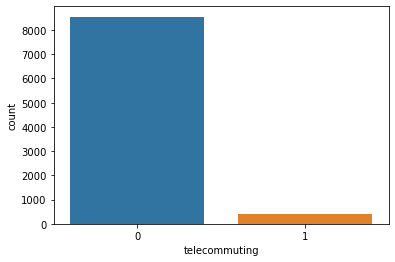

In [79]:
sns.countplot(x='telecommuting', data=df)
plt.show()

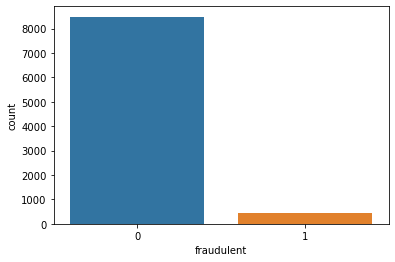

In [80]:
sns.countplot(x='fraudulent', data=df)
plt.show()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             8940 non-null   object
 1   location          8783 non-null   object
 2   description       8939 non-null   object
 3   requirements      7614 non-null   object
 4   telecommuting     8940 non-null   int64 
 5   has_company_logo  8940 non-null   int64 
 6   has_questions     8940 non-null   int64 
 7   fraudulent        8940 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 558.9+ KB


In [82]:
df.isnull().sum()

title                  0
location             157
description            1
requirements        1326
telecommuting          0
has_company_logo       0
has_questions          0
fraudulent             0
dtype: int64

In [83]:
df['fraudulent'].value_counts()

0    8484
1     456
Name: fraudulent, dtype: int64

In [84]:
frad = df[df['fraudulent']==1]

In [85]:
frad.isnull().sum()

title                0
location             8
description          1
requirements        76
telecommuting        0
has_company_logo     0
has_questions        0
fraudulent           0
dtype: int64

<center><h1>Data Wrangling</h1></center>

<h2> Dealing with Missing Values. </h2>

In [86]:
df.dropna(subset=['description'], axis=0, inplace=True)

In [87]:
df.isnull().sum()

title                  0
location             157
description            0
requirements        1325
telecommuting          0
has_company_logo       0
has_questions          0
fraudulent             0
dtype: int64

In [88]:
df['location'] = df.location.fillna('not specified')

In [89]:
df.head(5)

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0


In [90]:
df[df['requirements'].isnull()]

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
10,RoR Specialist,"US, CA, Long Beach",Ruby on Rails Web Engineer (RoR)Now Hiring Rub...,NaN,0,0,0,0
17,Technical Support Specialist,"US, FL, Fort Lauderdale",This newly created role will be filled by a hi...,NaN,0,0,0,0
19,Work for Point Nine (VC),not specified,Sounds like what you want to do? Then apply to...,NaN,0,1,0,0
26,Delivery Drivers,"US, TX, Austin","Eat Out In is a well established, fast paced, ...",NaN,0,0,0,0
30,Web Designer,"US, FL, Boca Raton","Title: Sr. Web DesignerLocation: Boca Raton, F...",NaN,0,1,1,0
...,...,...,...,...,...,...,...,...
8915,The Symicor Group is Looking for Seasoned Bank...,"US, TX, Dallas",Senior Bank RecruiterWho We Are“Bankers Recrui...,NaN,0,1,0,0
8919,Controls Engineer,"US, PA, Philadelphia",(We have more than 1500+ Job openings in our w...,NaN,0,0,0,0
8925,"Home Health Aid, Kennewick, WA","US, WA, Kennewick","HHACritical Nurse Staffing, Inc. is seeking an...",NaN,0,1,0,0
8928,Retail Buyer,"CY, 01, Nicosia",We are seeking for young developable executive...,NaN,0,0,1,0


In [91]:
df.corr()

,telecommuting,has_company_logo,has_questions,fraudulent
telecommuting,1.000000,-0.033366,0.000508,0.045039
has_company_logo,-0.033366,1.000000,0.232732,-0.256326
has_questions,0.000508,0.232732,1.000000,-0.098490
fraudulent,0.045039,-0.256326,-0.098490,1.000000


In [92]:
df.describe(include='all')

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
count,8939,8939,8939,7614,8939.000000,8939.000000,8939.000000,8939.000000
unique,6132,2132,7767,6327,NaN,NaN,NaN,NaN
top,English Teacher Abroad,"GB, LND, London","Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,NaN,NaN,NaN,NaN
freq,152,367,187,200,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.043741,0.794496,0.487303,0.050901
std,NaN,NaN,NaN,NaN,0.204530,0.404092,0.499867,0.219807
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,0.000000


In [93]:
df['requirements'] = df.requirements.fillna('not specified')

In [94]:
df.head(5)

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0


In [95]:
df.isnull().sum()

title               0
location            0
description         0
requirements        0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

<center><h1> Remove Punctuation And Stop Words From the data. </h1></center>

<h3> Now we have done with dealing the missing Values. Now we are going to further pre-process the data.</h3>

In [96]:
df.columns

Index(['title', 'location', 'description', 'requirements', 'telecommuting',
       'has_company_logo', 'has_questions', 'fraudulent'],
      dtype='object')

In [97]:
columns = ['title', 'location', 'description', 'requirements']

In [98]:
for column in columns:
    df[column] = df[column].str.replace(r'\W',' ').str.replace(r'\s$','')

In [99]:
df.head()

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,Architect Middleware MQ Kuwait,KW KU,On behalf of our client a well known multinat...,Working technical knowledge of IT systems and...,0,1,0,0
1,Interviewing Now for Sales Rep Positions wi...,US TX Corpus Christi,We are Argenta Field Solutions a rapidly expa...,NAME,0,1,0,0
2,Process Controls Staff Engineer Foxboro I A ...,US TX USA Southwest,Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0
3,Experienced Telemarketer Wanted Digital Solu...,AU NSW,If you have a passion for people and love to s...,Responsibilities Prospecting following up a...,0,1,0,0
4,Senior Network Engineer,GB ENG London,As the successful Senior Network Engineer you ...,Essential skills Juniper switching routing se...,0,1,0,0


In [100]:
def clean_series(column_name):
    df[column_name] = df[column_name].apply(lambda x: " ".join([i for i in x.lower().split() if i not in STOPWORDS]))

In [101]:
text_columns = ['title', 'location', 'description', 'requirements']
for column in text_columns:
    clean_series(column)

In [102]:
df.head()

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,architect middleware mq kuwait,kw ku,behalf client known multinational retail compa...,working technical knowledge systems fundamenta...,0,1,0,0
1,interviewing sales rep positions management tr...,tx corpus christi,argenta field solutions rapidly expanding awar...,,0,1,0,0
2,process controls staff engineer foxboro tricon...,tx usa southwest,experienced process controls staff engineer re...,10 years degreed professional experience minim...,0,0,0,0
3,experienced telemarketer wanted digital solutions,au nsw,passion people love sell telephone roles overv...,responsibilities prospecting following lead ge...,0,1,0,0
4,senior network engineer,gb eng london,successful senior network engineer jncia certi...,essential skills juniper switching routing sec...,0,1,0,0


<h2> Vectrorize the Data and transform in to Matrix. </h2>

In [103]:
vectorizer = TfidfVectorizer()

In [106]:
def vectorize_data(column):
    df[column] = vectorizer.fit_transform(df[column]).toarray()
text_columns = ['title','location','description','requirements']

In [107]:
for column in text_columns:
    vectorize_data(column)

In [110]:
df[400:500]

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
400,0.0,0.0,0.0,0.0,0,0,0,0
401,0.0,0.0,0.0,0.0,0,1,1,0
402,0.0,0.0,0.0,0.0,0,0,1,0
403,0.0,0.0,0.0,0.0,0,1,1,0
404,0.0,0.0,0.0,0.0,0,1,1,0
...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0,1,1,0
496,0.0,0.0,0.0,0.0,0,1,0,0
497,0.0,0.0,0.0,0.0,1,1,1,0
498,0.0,0.0,0.0,0.0,0,1,0,0


<center><h1> Model Training </h1></center>

In [111]:
X = df.drop(['fraudulent'], axis=1).values

In [112]:
Y = df['fraudulent'].values

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [114]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [115]:
y_pred = classifier.predict(x_test)

In [116]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [131]:
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred,average=None)

<center> <h1> Accuracy </h1> </center>

In [139]:
print("Accuracy score is {}".format(round(accuracy*100,2)))

Accuracy score is 95.36


<center> <h1> F1 Score </h1> </center>

In [137]:
print("F1 Score is {}:".format(round(f_score[0])))

F1 Score is 1.0:


In [154]:
file = open('fake_job.pkl', 'wb')
pickle.dump(classifier, file)
file.close()

<h3> Loading Model From Pickle </h3> 

In [156]:
file = open('fake_job.pkl', 'rb')
model = pickle.load(file)

In [157]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)